In [24]:
import tensorflow as tf
import sklearn
import pandas as pd
import matplotlib.pyplot as plt

Payments Data

In [3]:
df_Payment = pd.read_excel("BA_Case_study.xlsx", sheet_name= "Payments Data")
df_Payment
df_Payment['Account Number'].is_unique

False

Grouping Payments Data

In [4]:
df_Payment = df_Payment.groupby('Account Number', 
                                      as_index=False).agg({'sum':'sum', 'Mode ': lambda x: x.mode().iat[0]})

df_Payment['Account Number'].is_unique
df_Payment

,Account Number,sum,Mode
0,M1,45.367875,Card II TYPE
1,M10,43.938563,Card II TYPE
2,M1000,32.555250,Card II TYPE
3,M10000,36.546563,Card II TYPE
4,M1001,36.201375,Card II TYPE
...,...,...,...
14077,V993,32.370188,Card II TYPE
14078,V994,24.121125,Card II TYPE
14079,V995,43.203563,Card II TYPE
14080,V997,29.243812,Card II TYPE


#### Merging payment data to main data

In [5]:
df_data = pd.read_excel("BA_Case_study.xlsx", sheet_name= "Demographic Data")
df_data

,Unnamed: 0,Account Number,Commence Date,Address,Scheme,Staus,Gender,Region,Sale of Equipment Status,Age,Equipment Warranty,Salary Slab,Professional Info,Age of Home,Equipment Warranty Expiry Date,Churn Date
0,NaN,M1,2011-11-04,VALID,KLA,Open,Female,Northern,RENTED,70.0,Three Full Years,5.0,0.0,17.0,2015-04-03,NaT
1,NaN,M2,2011-11-28,VALID,PPL,Open,Female,Western,RENTED,55.0,Three Full Years,7.0,0.0,22.0,2015-04-03,NaT
2,NaN,M3,2011-12-06,VALID,KLA,Open,Male,Eastern,RENTED,64.0,Three Full Years,1.0,5.0,17.0,2016-04-03,NaT
3,NaN,M4,2011-10-28,VALID,MXX,Open,Female,Northern,RENTED,66.0,Three Full Years,6.0,14.0,22.0,2015-04-03,NaT
4,NaN,M5,2015-01-18,VALID,PRP,Open,NaN,Western,RENTED,NaN,Full Year,NaN,NaN,NaN,2016-01-03,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14947,NaN,V4996,2011-12-08,VALID,POP,Open,Female,Eastern,RENTED,57.0,Three Full Years,6.0,0.0,22.0,2015-07-23,NaT
14948,NaN,V4997,2012-02-13,VALID,POP,Open,Male,Northern,BOUGHT,65.0,Three Full Years,5.0,14.0,21.0,2015-07-29,NaT
14949,NaN,V4998,2012-06-24,VALID,KLA,Open,Male,Northern,RENTED,52.0,Three Full Years,6.0,0.0,21.0,2015-07-25,NaT
14950,NaN,V4999,2013-11-28,VALID,POP,Open,Male,Northern,RENTED,46.0,Three Full Years,8.0,8.0,22.0,2016-08-03,NaT


In [6]:
df_data = pd.merge(df_data,df_Payment, how = 'left', on = ['Account Number'])

df_data.drop("Unnamed: 0", inplace=True, axis=1)
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14952 entries, 0 to 14951
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Account Number                  14952 non-null  object        
 1   Commence Date                   14947 non-null  datetime64[ns]
 2   Address                         14549 non-null  object        
 3   Scheme                          14952 non-null  object        
 4   Staus                           14952 non-null  object        
 5   Gender                          12913 non-null  object        
 6   Region                          14952 non-null  object        
 7    Sale of Equipment Status       14952 non-null  object        
 8   Age                             11992 non-null  float64       
 9   Equipment Warranty              14320 non-null  object        
 10  Salary Slab                     12944 non-null  float64       
 11  Pr

#### Pattern Data

In [7]:
df_Pattern = pd.read_excel("BA_Case_study.xlsx", sheet_name= "Use Pattern")
df_Pattern.drop("Unnamed: 0", inplace=True, axis=1)
df_Pattern.rename(columns = {'Account Number ':'Account Number'}, inplace = True)
df_Pattern = df_Pattern.groupby('Account Number', as_index=False).agg({'Used pattern in hours':'sum',
                                                                  'Usage Post Limit Utilization in hrs':'sum',
                                                                  'data used Gb':'sum'})
df_Pattern

,Account Number,Used pattern in hours,Usage Post Limit Utilization in hrs,data used Gb
0,M1,2015.00,0,263.25
1,M10,1814.40,0,101.85
2,M100,2082.43,0,523.75
3,M1000,1237.47,0,1.45
4,M10000,2069.07,597,328.20
...,...,...,...,...
14534,V994,1801.17,0,103.70
14535,V995,2053.03,0,77.75
14536,V997,2194.55,1099,739.75
14537,V998,2085.17,63,251.60


#### Merging Pattern Data to main data

In [8]:
df_data = pd.merge(df_data,df_Pattern, how = 'left', on = ['Account Number'])

df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14952 entries, 0 to 14951
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Account Number                       14952 non-null  object        
 1   Commence Date                        14947 non-null  datetime64[ns]
 2   Address                              14549 non-null  object        
 3   Scheme                               14952 non-null  object        
 4   Staus                                14952 non-null  object        
 5   Gender                               12913 non-null  object        
 6   Region                               14952 non-null  object        
 7    Sale of Equipment Status            14952 non-null  object        
 8   Age                                  11992 non-null  float64       
 9   Equipment Warranty                   14320 non-null  object        
 10  Salary Sla

#### Defaults Data

In [9]:
df_Defaults = pd.read_excel("BA_Case_study.xlsx", sheet_name= "Defaults data")
df_Defaults = df_Defaults.groupby('Account Number', as_index=False).agg({'Default Sum':'sum'})
df_Defaults

,Account Number,Default Sum
0,M100,12.96500
1,M1002,35.19000
2,M1039,22.53250
3,M104,7.64750
4,M1045,8.12250
...,...,...
1726,V957,8.21750
1727,V969,9.17875
1728,V975,16.54500
1729,V990,8.32375


#### Merging Defaults Data 

In [10]:
df_data = pd.merge(df_data,df_Defaults, how = 'left', on = ['Account Number'])

df_data

,Account Number,Commence Date,Address,Scheme,Staus,Gender,Region,Sale of Equipment Status,Age,Equipment Warranty,...,Professional Info,Age of Home,Equipment Warranty Expiry Date,Churn Date,sum,Mode,Used pattern in hours,Usage Post Limit Utilization in hrs,data used Gb,Default Sum
0,M1,2011-11-04,VALID,KLA,Open,Female,Northern,RENTED,70.0,Three Full Years,...,0.0,17.0,2015-04-03,NaT,45.367875,Card II TYPE,2015.00,0.0,263.25,NaN
1,M2,2011-11-28,VALID,PPL,Open,Female,Western,RENTED,55.0,Three Full Years,...,0.0,22.0,2015-04-03,NaT,28.188562,Card II TYPE,1844.29,5.0,272.80,NaN
2,M3,2011-12-06,VALID,KLA,Open,Male,Eastern,RENTED,64.0,Three Full Years,...,5.0,17.0,2016-04-03,NaT,39.914438,Card II TYPE,2012.82,0.0,194.85,NaN
3,M4,2011-10-28,VALID,MXX,Open,Female,Northern,RENTED,66.0,Three Full Years,...,14.0,22.0,2015-04-03,NaT,51.581250,Card II TYPE,2010.53,0.0,172.00,NaN
4,M5,2015-01-18,VALID,PRP,Open,NaN,Western,RENTED,NaN,Full Year,...,NaN,NaN,2016-01-03,NaT,32.702250,Card II TYPE,1293.18,0.0,17.60,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14947,V4996,2011-12-08,VALID,POP,Open,Female,Eastern,RENTED,57.0,Three Full Years,...,0.0,22.0,2015-07-23,NaT,NaN,NaN,1807.10,0.0,70.25,NaN
14948,V4997,2012-02-13,VALID,POP,Open,Male,Northern,BOUGHT,65.0,Three Full Years,...,14.0,21.0,2015-07-29,NaT,NaN,NaN,2079.63,0.0,171.30,NaN
14949,V4998,2012-06-24,VALID,KLA,Open,Male,Northern,RENTED,52.0,Three Full Years,...,0.0,21.0,2015-07-25,NaT,NaN,NaN,2201.85,89.0,741.25,NaN
14950,V4999,2013-11-28,VALID,POP,Open,Male,Northern,RENTED,46.0,Three Full Years,...,8.0,22.0,2016-08-03,NaT,NaN,NaN,1616.52,0.0,161.40,NaN


#### Call Centre Data

In [11]:
df_CallCentre = pd.read_excel("BA_Case_study.xlsx", sheet_name= "Call Centre Data")
df_CallCentre['Full Statement of the Enquiry'] = df_CallCentre['Full Statement of the Enquiry'].map(lambda x: x[9:])
df_CallCentre.drop("Unnamed: 0", inplace=True, axis=1)

df_CallCentre = df_CallCentre.groupby(['Account Number'], as_index = False).agg({'Full Statement of the Enquiry': ' '.join})

df_CallCentre

,Account Number,Full Statement of the Enquiry
0,M100,Initial LevelPayment Settlement-Payment Settle...
1,M1002,Initial LevelPayment Settlement-Payment Settle...
2,M1007,Initial LevelPayment Settlement-Account-Update...
3,M101,Initial LevelTech-Account-Inbound-Disconnected...
4,M1010,Initial LevelTech-Operational Capabilities-Bro...
...,...,...
5458,V988,Initial LevelPayment Settlement-Account-Genera...
5459,V990,Initial LevelPayment Settlement-Payment Settle...
5460,V996,Initial LevelPayment Settlement-Account-Genera...
5461,V997,Initial LevelPayment Settlement-ABC#$@ Communi...


#### Merging Call Cnetre Data

In [12]:
df_data = pd.merge(df_data,df_CallCentre, how = 'left', on = ['Account Number'])
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14952 entries, 0 to 14951
Data columns (total 22 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Account Number                       14952 non-null  object        
 1   Commence Date                        14947 non-null  datetime64[ns]
 2   Address                              14549 non-null  object        
 3   Scheme                               14952 non-null  object        
 4   Staus                                14952 non-null  object        
 5   Gender                               12913 non-null  object        
 6   Region                               14952 non-null  object        
 7    Sale of Equipment Status            14952 non-null  object        
 8   Age                                  11992 non-null  float64       
 9   Equipment Warranty                   14320 non-null  object        
 10  Salary Sla

#### Checking Null values in Dataframe

In [13]:
df_data.isna().sum()

Account Number                             0
Commence Date                              5
Address                                  403
Scheme                                     0
Staus                                      0
Gender                                  2039
Region                                     0
 Sale of Equipment Status                  0
Age                                     2960
Equipment Warranty                       632
Salary Slab                             2008
Professional Info                       2008
Age of Home                             2008
Equipment Warranty Expiry Date           632
Churn Date                             14446
sum                                      916
Mode                                     916
Used pattern in hours                    459
Usage Post Limit Utilization in hrs      459
data used Gb                             459
Default Sum                            13225
Full Statement of the Enquiry           9499
dtype: int

#### Splitting Dataset into Train and Validation

In [14]:
mask = df_data['Account Number'].str.contains("M")
df_train = df_data[mask]

df_val = df_data[~mask]


In [15]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9966 entries, 0 to 9965
Data columns (total 22 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Account Number                       9966 non-null   object        
 1   Commence Date                        9963 non-null   datetime64[ns]
 2   Address                              9580 non-null   object        
 3   Scheme                               9966 non-null   object        
 4   Staus                                9966 non-null   object        
 5   Gender                               8598 non-null   object        
 6   Region                               9966 non-null   object        
 7    Sale of Equipment Status            9966 non-null   object        
 8   Age                                  7953 non-null   float64       
 9   Equipment Warranty                   9558 non-null   object        
 10  Salary Slab 

In [16]:
df_train.columns

Index(['Account Number', 'Commence Date', 'Address', 'Scheme', 'Staus',
       'Gender', 'Region ', ' Sale of Equipment Status', 'Age',
       'Equipment Warranty', 'Salary Slab', 'Professional Info', 'Age of Home',
       'Equipment Warranty Expiry Date', 'Churn Date', 'sum', 'Mode ',
       'Used pattern in hours', 'Usage Post Limit Utilization in hrs',
       'data used Gb', 'Default Sum', 'Full Statement of the Enquiry'],
      dtype='object')

In [17]:
for col in ['Address', 'Scheme', 'Staus', 'Gender', 'Region ',' Sale of Equipment Status','Equipment Warranty', 'Mode ']:
    df_train[col] = df_train[col].astype('category')

C:\Users\Q554701\AppData\Local\Temp/ipykernel_5068/798463392.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[col] = df_train[col].astype('category')
C:\Users\Q554701\AppData\Local\Temp/ipykernel_5068/798463392.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[col] = df_train[col].astype('category')
C:\Users\Q554701\AppData\Local\Temp/ipykernel_5068/798463392.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

In [18]:

df_train

,Account Number,Commence Date,Address,Scheme,Staus,Gender,Region,Sale of Equipment Status,Age,Equipment Warranty,...,Age of Home,Equipment Warranty Expiry Date,Churn Date,sum,Mode,Used pattern in hours,Usage Post Limit Utilization in hrs,data used Gb,Default Sum,Full Statement of the Enquiry
0,M1,2011-11-04,VALID,KLA,Open,Female,Northern,RENTED,70.0,Three Full Years,...,17.0,2015-04-03,NaT,45.367875,Card II TYPE,2015.00,0.0,263.25,NaN,NaN
1,M2,2011-11-28,VALID,PPL,Open,Female,Western,RENTED,55.0,Three Full Years,...,22.0,2015-04-03,NaT,28.188562,Card II TYPE,1844.29,5.0,272.80,NaN,Initial LevelPayment Settlement-Account-Change...
2,M3,2011-12-06,VALID,KLA,Open,Male,Eastern,RENTED,64.0,Three Full Years,...,17.0,2016-04-03,NaT,39.914438,Card II TYPE,2012.82,0.0,194.85,NaN,NaN
3,M4,2011-10-28,VALID,MXX,Open,Female,Northern,RENTED,66.0,Three Full Years,...,22.0,2015-04-03,NaT,51.581250,Card II TYPE,2010.53,0.0,172.00,NaN,NaN
4,M5,2015-01-18,VALID,PRP,Open,NaN,Western,RENTED,NaN,Full Year,...,NaN,2016-01-03,NaT,32.702250,Card II TYPE,1293.18,0.0,17.60,NaN,Initial LevelTech-No support / Third Party-Red...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9961,M9996,2013-11-20,VALID,PWR,Open,Male,Northern,BOUGHT,65.0,Three Full Years,...,21.0,2016-04-05,NaT,24.621187,Card II TYPE,1676.60,0.0,32.50,13.1325,Initial LevelTech-Payment Settlement-Explanati...
9962,M9997,2011-10-08,VALID,PWP,Open,Male,Eastern,RENTED,44.0,Three Full Years,...,22.0,2015-03-18,NaT,30.925125,Card I TYPE,1777.95,0.0,46.35,NaN,NaN
9963,M9998,2013-08-27,VALID,PWR,Open,NaN,Western,BOUGHT,NaN,Three Full Years,...,NaN,2015-08-21,NaT,23.621063,Card II TYPE,2165.23,0.0,220.35,NaN,Initial LevelPayment Settlement-Utilities-Emai...
9964,M9999,2012-07-06,VALID,KLA,Open,Female,Western,BOUGHT,69.0,Three Full Years,...,22.0,2015-03-14,NaT,35.622563,Card II TYPE,2041.03,0.0,436.25,NaN,NaN


### Data Preprocessing

Grouping Salary Column

In [19]:
df_train['Salary Slab'] = pd.cut(df_train['Salary Slab'], bins=[1,4,7,10,14], labels=[1,2,3,4])

C:\Users\Q554701\AppData\Local\Temp/ipykernel_5068/3977902243.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Salary Slab'] = pd.cut(df_train['Salary Slab'], bins=[1,4,7,10,14], labels=[1,2,3,4])


In [20]:
for col in ['Address', 'Scheme', 'Staus', 'Gender', 'Region ',' Sale of Equipment Status','Equipment Warranty', 'Mode ',
           'Salary Slab']:
    df_train[col] = df_train[col].astype('category')

C:\Users\Q554701\AppData\Local\Temp/ipykernel_5068/1506007305.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[col] = df_train[col].astype('category')


In [21]:
df_train['Churn Date'] = df_train['Churn Date'].apply(lambda x: 1 if isinstance(x, pd.Timestamp) else 0)

C:\Users\Q554701\AppData\Local\Temp/ipykernel_5068/673438349.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Churn Date'] = df_train['Churn Date'].apply(lambda x: 1 if isinstance(x, pd.Timestamp) else 0)


In [22]:
df_train.rename(columns={'Churn Date': 'Churn'}, inplace=True)

C:\Users\Q554701\AppData\Local\Temp/ipykernel_5068/504016549.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.rename(columns={'Churn Date': 'Churn'}, inplace=True)


<AxesSubplot:xlabel='Churn', ylabel='count'>

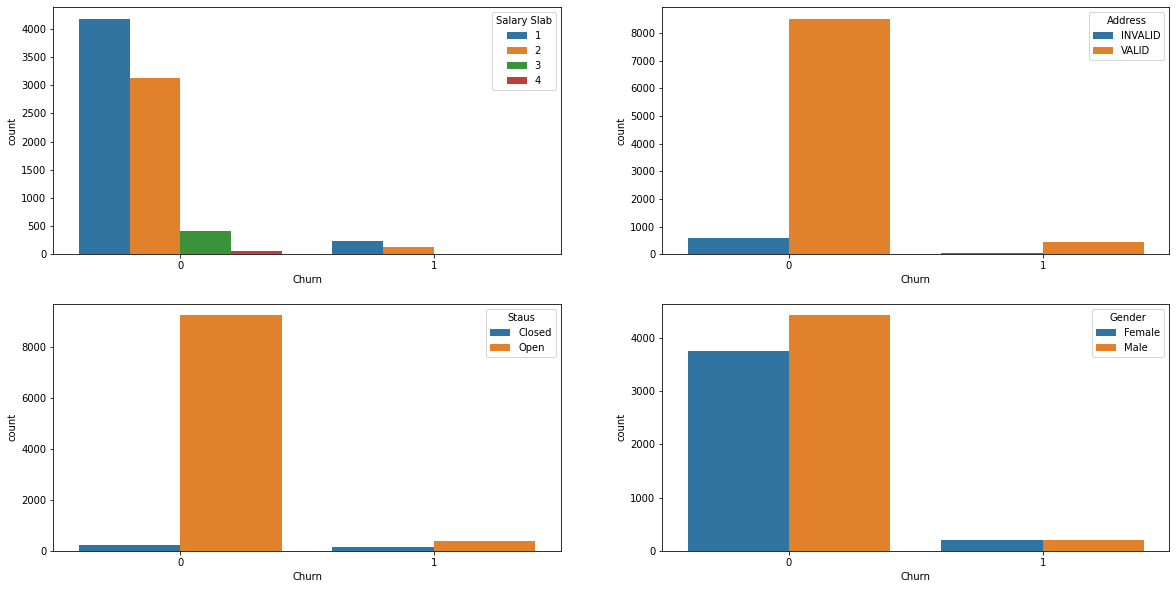

In [26]:
import seaborn as sns
_,axss = plt.subplots(2,2, figsize=[20,10])
sns.countplot(x='Churn', hue='Salary Slab', data=df_train, ax=axss[0][0])
sns.countplot(x='Churn', hue='Address', data=df_train, ax=axss[0][1])
sns.countplot(x='Churn', hue='Staus', data=df_train, ax=axss[1][0])
sns.countplot(x='Churn', hue='Gender', data=df_train, ax=axss[1][1])

<AxesSubplot:xlabel='Churn', ylabel='count'>

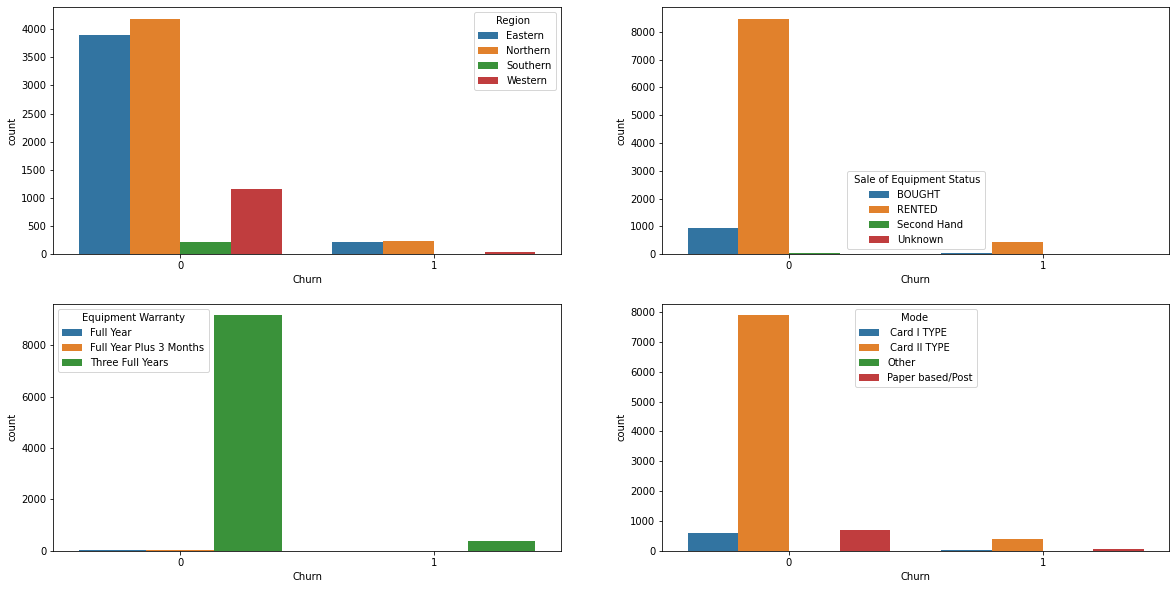

In [27]:
_,axss = plt.subplots(2,2, figsize=[20,10])
sns.countplot(x='Churn', hue='Region ', data=df_train, ax=axss[0][0])
sns.countplot(x='Churn', hue=' Sale of Equipment Status', data=df_train, ax=axss[0][1])
sns.countplot(x='Churn', hue='Equipment Warranty', data=df_train, ax=axss[1][0])
sns.countplot(x='Churn', hue='Mode ', data=df_train, ax=axss[1][1])


In [225]:
df_prof = df_train['Professional Info']

df_prof=df_prof.replace(to_replace=2,value="Accounting")
df_prof=df_prof.replace(to_replace=10,value="Academics")
df_prof=df_prof.replace(to_replace=11,value="Automotive")
df_prof=df_prof.replace(to_replace=17,value="Defence")
df_prof=df_prof.replace(to_replace=9,value="Pharmacueticals")
df_prof=df_prof.replace(to_replace=7,value="Labour")
df_prof=df_prof.replace(to_replace=19,value="Others")
df_prof=df_prof.replace(to_replace=0,value="Missing")
df_prof=df_prof.replace(to_replace=[12,13,14,16,18],value="Banking")
df_prof=df_prof.replace(to_replace=[15,5,6,8,20],value="Financial")

In [227]:
df_train['Professional Info']= df_prof

C:\Users\Q554701\AppData\Local\Temp/ipykernel_24608/2128079578.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Professional Info']= df_prof


In [229]:
df_train['Professional Info']

0         Missing
1         Missing
2       Financial
3         Banking
4             NaN
          ...    
9961      Banking
9962      Missing
9963          NaN
9964    Financial
9965      Banking
Name: Professional Info, Length: 9966, dtype: object

In [240]:
df_age = df_train['Age of Home']
df_age = df_age.replace(to_replace=[1,2,3,4,5],value="Low")
df_age = df_age.replace(to_replace=[6,7,8,9,10],value="Medium")
df_age = df_age.replace(to_replace=[11,12,13,14,15],value="High")
df_age = df_age.replace(to_replace=[16,17,18,19,20,21,21,22],value="Very High")
df_train['Age of Home']= df_age

C:\Users\Q554701\AppData\Local\Temp/ipykernel_24608/3979181375.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Age of Home']= df_age


In [241]:
df_age

0       Very High
1       Very High
2       Very High
3       Very High
4             NaN
          ...    
9961    Very High
9962    Very High
9963          NaN
9964    Very High
9965    Very High
Name: Age of Home, Length: 9966, dtype: object

In [145]:
df_train['Professional Info'].unique()
df_train['Professional Info'] = df_train['Professional Info'].astype('category')

<AxesSubplot:xlabel='Churn', ylabel='count'>

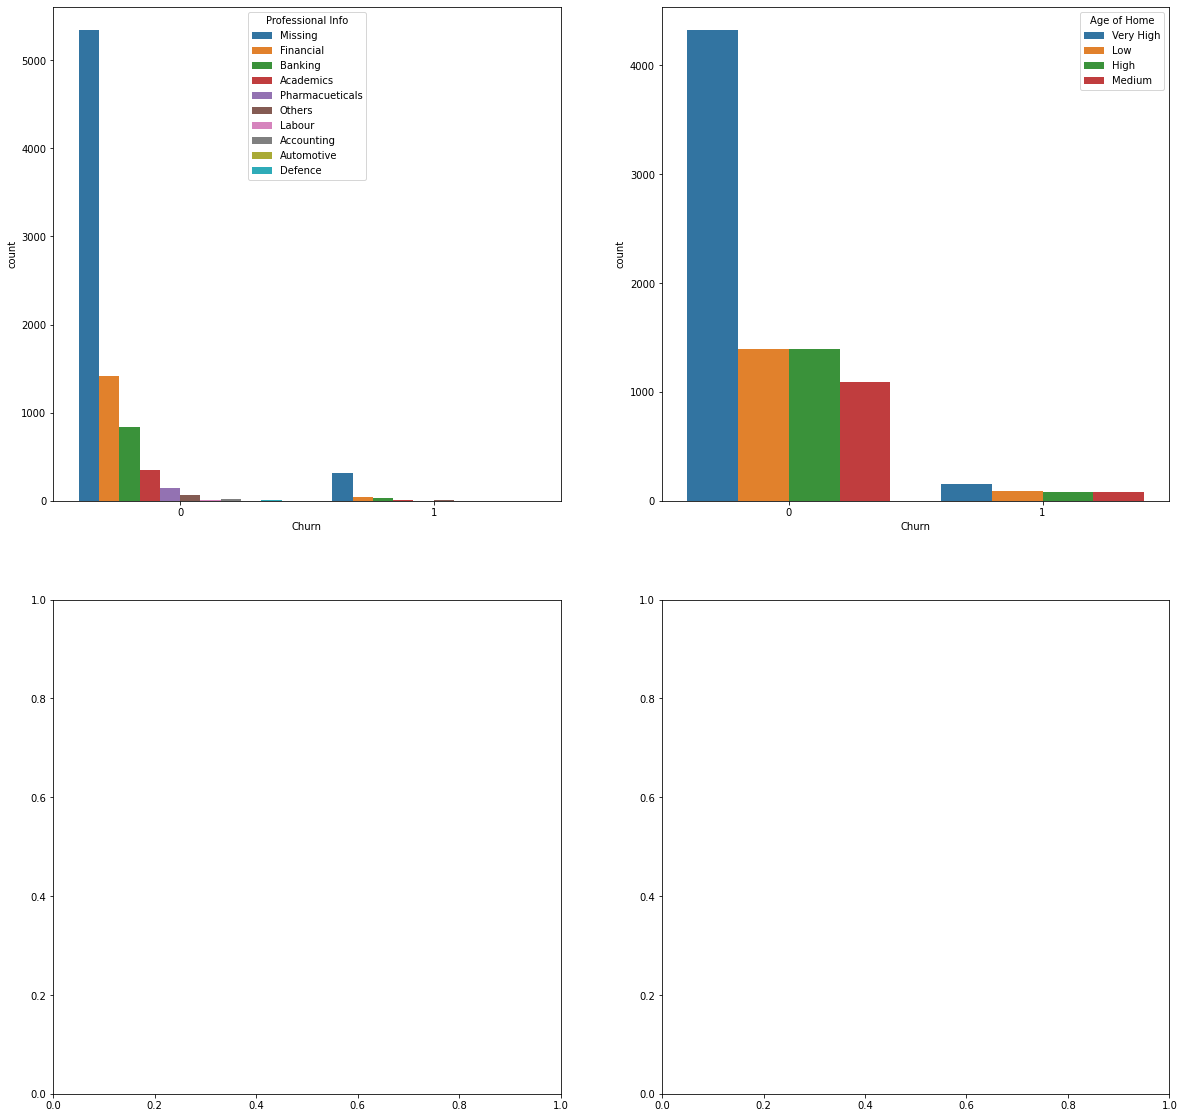

In [246]:
_,axss = plt.subplots(2,2, figsize=[20,20])
sns.countplot(x='Churn', hue='Professional Info', data=df_train, ax=axss[0][0])
sns.countplot(x='Churn', hue='Age of Home', data=df_train, ax=axss[0][1])

In [252]:
df_train.isna().count()

Account Number                         9966
Commence Date                          9966
Address                                9966
Scheme                                 9966
Staus                                  9966
Gender                                 9966
Region                                 9966
 Sale of Equipment Status              9966
Age                                    9966
Equipment Warranty                     9966
Salary Slab                            9966
Professional Info                      9966
Age of Home                            9966
Equipment Warranty Expiry Date         9966
Churn                                  9966
sum                                    9966
Mode                                   9966
Used pattern in hours                  9966
Usage Post Limit Utilization in hrs    9966
data used Gb                           9966
Default Sum                            9966
Full Statement of the Enquiry          9966
dtype: int64

Handling Missing Values

In [44]:
df_train.isna().sum()

Unnamed: 0                             9966
Account Number                            0
Commence Date                             3
Address                                   0
Scheme                                    0
Staus                                     0
Gender                                    0
Region                                    0
 Sale of Equipment Status                 0
Age                                    2013
Equipment Warranty                        0
Salary Slab                            1795
Professional Info                      1351
Age of Home                            1351
Equipment Warranty Expiry Date          408
Churn Date                                0
Used pattern in hours                     0
Usage Post Limit Utilization in hrs       0
data used Gb                              0
Default Sum                               0
Full Statement of the Enquiry          6396
dtype: int64

In [71]:
df_train['Churn Date'] = df_train['Churn Date'].apply(lambda x: 1 if isinstance(x, pd.Timestamp) else 0)

C:\Users\Q554701\AppData\Local\Temp/ipykernel_24608/673438349.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Churn Date'] = df_train['Churn Date'].apply(lambda x: 1 if isinstance(x, pd.Timestamp) else 0)


In [24]:
df_train['Churn Date'].unique()

array([0, 1], dtype=int64)

In [26]:
df_train['Churn Date']

0       0
1       0
2       0
3       0
4       0
       ..
9961    0
9962    0
9963    0
9964    0
9965    0
Name: Churn Date, Length: 9966, dtype: int64

In [72]:
df_train['Used pattern in hours'] = df_train['Used pattern in hours'].fillna(0)
df_train['Usage Post Limit Utilization in hrs'] = df_train['Usage Post Limit Utilization in hrs'].fillna(0)
df_train['data used Gb'] = df_train['data used Gb'].fillna(0)
df_train['Default Sum'] = df_train['Default Sum'].fillna(0)
df_train['sum'] = df_train['sum'].fillna(0)
#df_train['Salary Slab'] = df_train['Salary Slab'].fillna(0)
df_train['Full Statement of the Enquiry'] = df_train['Full Statement of the Enquiry'].fillna('NOTKNOWN')

C:\Users\Q554701\AppData\Local\Temp/ipykernel_24608/2024960796.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Used pattern in hours'] = df_train['Used pattern in hours'].fillna(0)
C:\Users\Q554701\AppData\Local\Temp/ipykernel_24608/2024960796.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Usage Post Limit Utilization in hrs'] = df_train['Usage Post Limit Utilization in hrs'].fillna(0)
C:\Users\Q554701\AppData\Local\Temp/ipykernel_24608/2024960796.py:3: SettingWithCopyWarning: 


In [248]:
df_train.isna().sum()

Account Number                            0
Commence Date                             3
Address                                   0
Scheme                                    0
Staus                                     0
Gender                                    0
Region                                    0
 Sale of Equipment Status                 0
Age                                    2013
Equipment Warranty                        0
Salary Slab                            1795
Professional Info                      1351
Age of Home                            1351
Equipment Warranty Expiry Date          408
Churn Date                                0
sum                                       0
Mode                                    322
Used pattern in hours                     0
Usage Post Limit Utilization in hrs       0
data used Gb                              0
Default Sum                               0
Full Statement of the Enquiry             0
dtype: int64

In [73]:
df_train['Mode '] = df_train['Mode '].fillna('NOTKNOWN')

C:\Users\Q554701\AppData\Local\Temp/ipykernel_24608/2982394488.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Mode '] = df_train['Mode '].fillna('NOTKNOWN')


In [74]:
#df_train['Salary Slab'] = df_train['Salary Slab'].fillna(0)
df_train['Salary Slab'] = df_train['Salary Slab'].cat.add_categories(0).fillna(0)

C:\Users\Q554701\AppData\Local\Temp/ipykernel_24608/3051617511.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Salary Slab'] = df_train['Salary Slab'].cat.add_categories(0).fillna(0)


In [251]:
df_train.isna().sum()

Account Number                            0
Commence Date                             3
Address                                   0
Scheme                                    0
Staus                                     0
Gender                                    0
Region                                    0
 Sale of Equipment Status                 0
Age                                    2013
Equipment Warranty                        0
Salary Slab                               0
Professional Info                      1351
Age of Home                            1351
Equipment Warranty Expiry Date          408
Churn Date                                0
sum                                       0
Mode                                      0
Used pattern in hours                     0
Usage Post Limit Utilization in hrs       0
data used Gb                              0
Default Sum                               0
Full Statement of the Enquiry             0
dtype: int64

In [75]:
df_train['Age of Home'] = df_train['Age of Home'].fillna(0)

C:\Users\Q554701\AppData\Local\Temp/ipykernel_24608/1162515751.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Age of Home'] = df_train['Age of Home'].fillna(0)


In [76]:
df_train.drop(columns=['Equipment Warranty Expiry Date', 'Commence Date'], axis=1, inplace=True)

C:\Users\Q554701\AppData\Local\Temp/ipykernel_24608/558230813.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(columns=['Equipment Warranty Expiry Date', 'Commence Date'], axis=1, inplace=True)


In [254]:
df_train.isna().sum()

Account Number                            0
Address                                   0
Scheme                                    0
Staus                                     0
Gender                                    0
Region                                    0
 Sale of Equipment Status                 0
Age                                    2013
Equipment Warranty                        0
Salary Slab                               0
Professional Info                      1351
Age of Home                               0
Churn Date                                0
sum                                       0
Mode                                      0
Used pattern in hours                     0
Usage Post Limit Utilization in hrs       0
data used Gb                              0
Default Sum                               0
Full Statement of the Enquiry             0
dtype: int64

#### Missing values handling of Age

In [77]:
df_train['Age'] = df_train['Age'].fillna(0)

C:\Users\Q554701\AppData\Local\Temp/ipykernel_24608/1208285575.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Age'] = df_train['Age'].fillna(0)


In [78]:
df_train.isna().sum()

Account Number                            0
Address                                   0
Scheme                                    0
Staus                                     0
Gender                                    0
Region                                    0
 Sale of Equipment Status                 0
Age                                       0
Equipment Warranty                        0
Salary Slab                               0
Professional Info                      1351
Age of Home                               0
Churn Date                                0
sum                                       0
Mode                                      0
Used pattern in hours                     0
Usage Post Limit Utilization in hrs       0
data used Gb                              0
Default Sum                               0
Full Statement of the Enquiry             0
dtype: int64

In [79]:
df_train.drop(columns=['Professional Info'], axis=1, inplace=True)

C:\Users\Q554701\AppData\Local\Temp/ipykernel_24608/269595041.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(columns=['Professional Info'], axis=1, inplace=True)


In [95]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9966 entries, 0 to 9965
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Account Number                       9966 non-null   object 
 1   Address                              9966 non-null   int32  
 2   Scheme                               9966 non-null   int32  
 3   Staus                                9966 non-null   int32  
 4   Gender                               9966 non-null   int32  
 5   Region                               9966 non-null   int32  
 6    Sale of Equipment Status            9966 non-null   int32  
 7   Age                                  9966 non-null   float64
 8   Equipment Warranty                   9966 non-null   int32  
 9   Salary Slab                          9966 non-null   int64  
 10  Age of Home                          9966 non-null   float64
 11  Churn Date                    

In [80]:
from sklearn.preprocessing import LabelEncoder
category = ['Address','Scheme','Staus','Gender','Region ',' Sale of Equipment Status',
           'Equipment Warranty', 'Salary Slab', 'Mode ' ]

# Encode Categorical Columns
le = LabelEncoder()
df_train[category] = df_train[category].apply(le.fit_transform)

C:\Users\Q554701\AppData\Local\Temp/ipykernel_24608/4076792881.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[category] = df_train[category].apply(le.fit_transform)


In [260]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9966 entries, 0 to 9965
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Account Number                       9966 non-null   object 
 1   Address                              9966 non-null   int64  
 2   Scheme                               9966 non-null   int64  
 3   Staus                                9966 non-null   int64  
 4   Gender                               9966 non-null   int64  
 5   Region                               9966 non-null   int64  
 6    Sale of Equipment Status            9966 non-null   int64  
 7   Age                                  9966 non-null   float64
 8   Equipment Warranty                   9966 non-null   int64  
 9   Salary Slab                          9966 non-null   int64  
 10  Age of Home                          9966 non-null   float64
 11  Churn Date                    

In [81]:
df_train_num = df_train.drop(columns=['Account Number', 'Full Statement of the Enquiry'], axis=1)

In [89]:
df_train_num["Scheme"]

0        3
1        7
2        3
3        4
4        9
        ..
9961    13
9962    12
9963    13
9964     3
9965    10
Name: Scheme, Length: 9966, dtype: int32

In [273]:
df_train_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9966 entries, 0 to 9965
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Address                              9966 non-null   int64  
 1   Scheme                               9966 non-null   int64  
 2   Staus                                9966 non-null   int64  
 3   Gender                               9966 non-null   int64  
 4   Region                               9966 non-null   int64  
 5    Sale of Equipment Status            9966 non-null   int64  
 6   Equipment Warranty                   9966 non-null   int64  
 7   Salary Slab                          9966 non-null   int64  
 8   Age of Home                          9966 non-null   float64
 9   Churn Date                           9966 non-null   int64  
 10  sum                                  9966 non-null   float64
 11  Mode                          

## Feature Selection

In [83]:
X = df_train_num.drop('Churn Date', axis=1)
y = df_train_num['Churn Date']

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [277]:
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features
X.head()

,Address,Scheme,Staus,Gender,Region,Sale of Equipment Status,Equipment Warranty,Salary Slab,Age of Home,sum,Mode,Used pattern in hours,Usage Post Limit Utilization in hrs,data used Gb,Default Sum
0,1.0,0.230769,1.0,0.0,0.333333,0.333333,1.0,0.5,0.772727,0.052566,0.25,0.920857,0.000000,0.066802,0.0
1,1.0,0.538462,1.0,0.0,1.000000,0.333333,1.0,0.5,1.000000,0.032661,0.25,0.842842,0.002854,0.069225,0.0
2,1.0,0.230769,1.0,0.5,0.000000,0.333333,1.0,0.0,0.772727,0.046247,0.25,0.919860,0.000000,0.049445,0.0
3,1.0,0.307692,1.0,0.0,0.333333,0.333333,1.0,0.5,1.000000,0.059765,0.25,0.918814,0.000000,0.043647,0.0
4,1.0,0.692308,1.0,1.0,1.000000,0.333333,0.0,0.0,0.000000,0.037891,0.25,0.590984,0.000000,0.004466,0.0


### Random Forest Classifier

In [325]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [326]:
X_train.shape

(7972, 15)

In [279]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
rf_c=RandomForestClassifier()

In [280]:
param_grid={'n_estimators':[int(x) for x in np.linspace(start=200,stop=1200,num=11)],
            'max_features':['auto','sqrt'],
            'max_depth':[int(x) for x in np.linspace(start=10,stop=100,num=11)],
            'min_samples_leaf':[1,2,3,5],
            'min_samples_split':[2,5,10,15]}

In [281]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
random_cv=RandomizedSearchCV(rf_c,param_grid,cv=3,verbose=2,random_state=42)
random_cv.fit(X_train,y_train)
best_random=random_cv.best_estimator_
prediction_cv=best_random.predict(X_test)
print(accuracy_score(y_test,prediction_cv))

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/Users/prajwalnagaraja/miniforge3/envs/sk/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=91, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   9.8s


/Users/prajwalnagaraja/miniforge3/envs/sk/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=91, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   9.7s


/Users/prajwalnagaraja/miniforge3/envs/sk/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=91, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   9.7s
[CV] END max_depth=91, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1100; total time=  13.1s
[CV] END max_depth=91, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1100; total time=  13.2s
[CV] END max_depth=91, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1100; total time=  12.9s


/Users/prajwalnagaraja/miniforge3/envs/sk/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=28, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=400; total time=   4.8s


/Users/prajwalnagaraja/miniforge3/envs/sk/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=28, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=400; total time=   4.7s


/Users/prajwalnagaraja/miniforge3/envs/sk/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=28, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=400; total time=   4.7s
[CV] END max_depth=37, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=900; total time=  11.0s
[CV] END max_depth=37, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=900; total time=  10.9s
[CV] END max_depth=37, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=900; total time=  10.8s


/Users/prajwalnagaraja/miniforge3/envs/sk/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=37, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1000; total time=  12.1s


/Users/prajwalnagaraja/miniforge3/envs/sk/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=37, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1000; total time=  11.9s


/Users/prajwalnagaraja/miniforge3/envs/sk/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=37, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1000; total time=  11.9s


/Users/prajwalnagaraja/miniforge3/envs/sk/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=37, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=800; total time=   9.8s


/Users/prajwalnagaraja/miniforge3/envs/sk/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=37, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=800; total time=   9.6s


/Users/prajwalnagaraja/miniforge3/envs/sk/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=37, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=800; total time=   9.7s
[CV] END max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1200; total time=  14.6s
[CV] END max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1200; total time=  14.7s
[CV] END max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1200; total time=  14.4s
[CV] END max_depth=82, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=300; total time=   3.6s
[CV] END max_depth=82, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=300; total time=   3.6s
[CV] END max_depth=82, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=300; total time=   3.6s
[CV] END max_depth=46, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=  14.4s
[CV] END max_depth=46, max_fe

/Users/prajwalnagaraja/miniforge3/envs/sk/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=64, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   4.9s


/Users/prajwalnagaraja/miniforge3/envs/sk/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=64, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   4.8s


/Users/prajwalnagaraja/miniforge3/envs/sk/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=64, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   4.9s


/Users/prajwalnagaraja/miniforge3/envs/sk/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


0.9508361204013378


### Using Neural Network

In [318]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Dense,Flatten

In [319]:
## Creating the layers
input_layer = Input(shape=(15,))
Layer_1 = Dense(4, activation="relu")(input_layer)
Layer_2 = Dense(4, activation="relu")(Layer_1)
flat1 = Flatten()(Layer_2)
#output_layer= Dense(1, activation="linear")(Layer_2)
##Defining the model by specifying the input and output layers
#model = Model(inputs=input_layer, outputs=output_layer)
## defining the optimiser and loss function
#model.compile(optimizer='adam',
              #loss='mse')
## training the model
#history = model.fit(X_train, y_train,epochs=400, batch_size=128,validation_data=(X_test,y_test))

### LSTM for Text Classification

In [284]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import re

print("Tensorflow Version",tf.__version__)

Tensorflow Version 2.8.0


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/prajwalnagaraja/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [285]:
stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')

text_cleaning_re = "@\S+#$/-|https?:\S+|http?:\S|[^A-Za-z0-9]+"

In [286]:
def preprocess(text, stem=False):
    
    text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()
    tokens = []
    for token in text.split():
        if token not in stop_words:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
    return " ".join(tokens)

In [287]:
df_train_text = df_train.filter(['Full Statement of the Enquiry', 'Churn Date'], axis=1)

In [290]:
df_train_text

,Full Statement of the Enquiry,Churn Date
0,NOTKNOWN,0
1,Initial LevelPayment Settlement-Account-Change...,0
2,NOTKNOWN,0
3,NOTKNOWN,0
4,Initial LevelTech-No support / Third Party-Red...,0
...,...,...
9961,Initial LevelTech-Payment Settlement-Explanati...,0
9962,NOTKNOWN,0
9963,Initial LevelPayment Settlement-Utilities-Emai...,0
9964,NOTKNOWN,0


In [292]:
df_train_text['Full Statement of the Enquiry'] = df_train_text['Full Statement of the Enquiry'].apply(lambda x: preprocess(x))


In [293]:
df_train_text

,Full Statement of the Enquiry,Churn Date
0,notknown,0
1,initial levelpayment settlement account change...,0
2,notknown,0
3,notknown,0
4,initial leveltech support third party redirect...,0
...,...,...
9961,initial leveltech payment settlement explanati...,0
9962,notknown,0
9963,initial levelpayment settlement utilities emai...,0
9964,notknown,0


In [30]:
from sklearn.utils import resample
not_churn = df_train[df_train['Churn Date']== 0]
churn = df_train[df_train['Churn Date']== 1]
    
churn_upsampled = resample(churn,
                          replace=True,
                          n_samples=len(not_churn),
                          random_state=42)

In [31]:
df_train

,Account Number,Commence Date,Address,Scheme,Staus,Gender,Region,Sale of Equipment Status,Age,Equipment Warranty,Salary Slab,Professional Info,Age of Home,Equipment Warranty Expiry Date,Churn Date,sum,Mode
0,M1,2011-11-04,VALID,KLA,Open,Female,Northern,RENTED,70.0,Three Full Years,5.0,0.0,17.0,2015-04-03,NaT,45.367875,Card II TYPE
1,M2,2011-11-28,VALID,PPL,Open,Female,Western,RENTED,55.0,Three Full Years,7.0,0.0,22.0,2015-04-03,NaT,28.188562,Card II TYPE
2,M3,2011-12-06,VALID,KLA,Open,Male,Eastern,RENTED,64.0,Three Full Years,1.0,5.0,17.0,2016-04-03,NaT,39.914438,Card II TYPE
3,M4,2011-10-28,VALID,MXX,Open,Female,Northern,RENTED,66.0,Three Full Years,6.0,14.0,22.0,2015-04-03,NaT,51.581250,Card II TYPE
4,M5,2015-01-18,VALID,PRP,Open,NaN,Western,RENTED,NaN,Full Year,NaN,NaN,NaN,2016-01-03,NaT,32.702250,Card II TYPE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9961,M9996,2013-11-20,VALID,PWR,Open,Male,Northern,BOUGHT,65.0,Three Full Years,7.0,14.0,21.0,2016-04-05,NaT,24.621187,Card II TYPE
9962,M9997,2011-10-08,VALID,PWP,Open,Male,Eastern,RENTED,44.0,Three Full Years,4.0,0.0,22.0,2015-03-18,NaT,30.925125,Card I TYPE
9963,M9998,2013-08-27,VALID,PWR,Open,NaN,Western,BOUGHT,NaN,Three Full Years,NaN,NaN,NaN,2015-08-21,NaT,23.621063,Card II TYPE
9964,M9999,2012-07-06,VALID,KLA,Open,Female,Western,BOUGHT,69.0,Three Full Years,6.0,5.0,22.0,2015-03-14,NaT,35.622563,Card II TYPE


In [294]:
df_train_text = df_train_text.rename(columns={'Full Statement of the Enquiry': 'text', 'Churn Date': 'churn'})

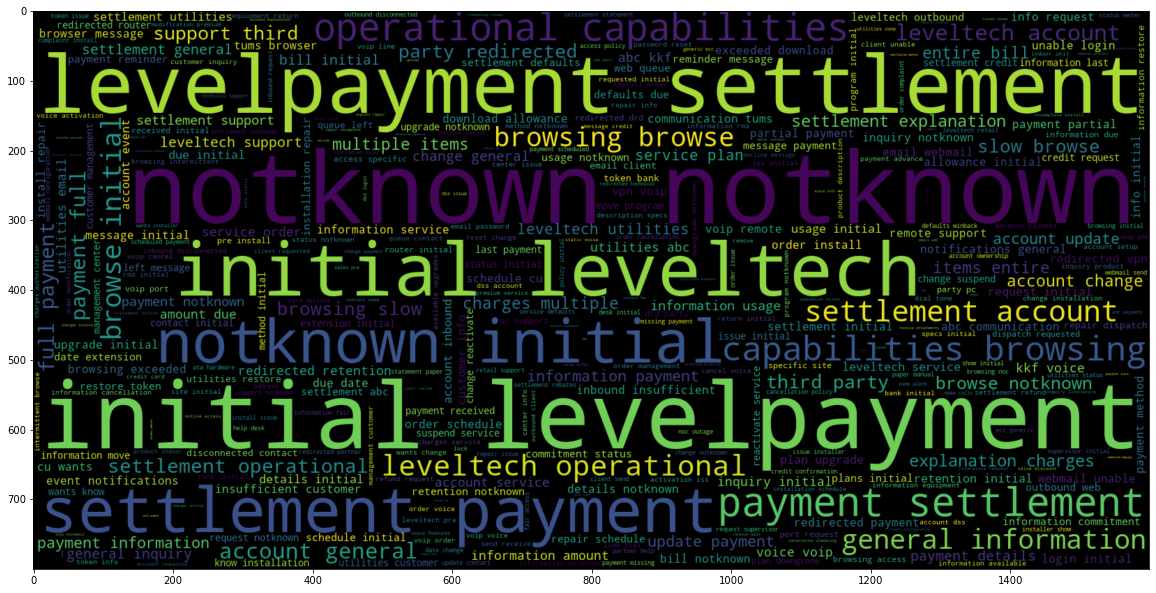

In [296]:
from wordcloud import WordCloud

plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df_train_text[df_train_text.churn == 0].text))
plt.imshow(wc , interpolation = 'bilinear')

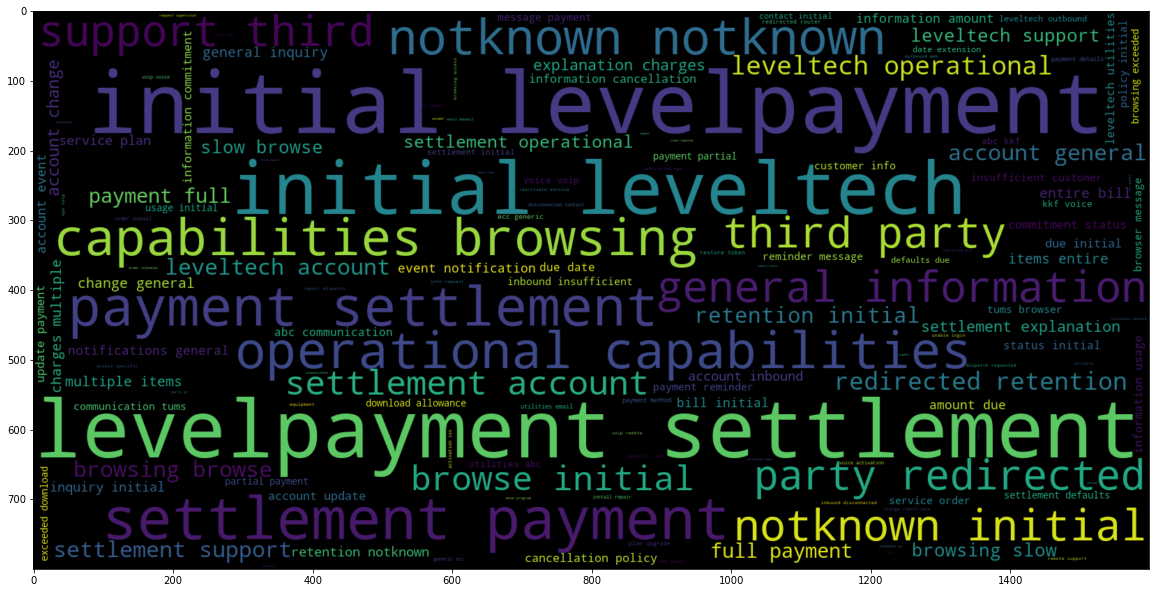

In [297]:
from wordcloud import WordCloud

plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df_train_text[df_train_text.churn == 1].text))
plt.imshow(wc , interpolation = 'bilinear')

In [298]:
TRAIN_SIZE = 0.8
MAX_NB_WORDS = 100000
MAX_SEQUENCE_LENGTH = 30

In [299]:
train_data, test_data = train_test_split(df_train_text, test_size=1-TRAIN_SIZE,
                                         random_state=7) # Splits Dataset into Training and Testing set
print("Train Data size:", len(train_data))
print("Test Data size", len(test_data))

Train Data size: 7972
Test Data size 1994


### Tokenization

In [300]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data.text)

word_index = tokenizer.word_index
vocab_size = len(tokenizer.word_index) + 1
print("Vocabulary Size :", vocab_size)

Vocabulary Size : 291


In [301]:
from keras.preprocessing.sequence import pad_sequences

x_train = pad_sequences(tokenizer.texts_to_sequences(train_data.text),
                        maxlen = MAX_SEQUENCE_LENGTH)
x_test = pad_sequences(tokenizer.texts_to_sequences(test_data.text),
                       maxlen = MAX_SEQUENCE_LENGTH)

print("Training X Shape:",x_train.shape)
print("Testing X Shape:",x_test.shape)

Training X Shape: (7972, 30)
Testing X Shape: (1994, 30)


In [303]:
labels = train_data.churn.unique().tolist()

In [304]:
encoder = LabelEncoder()
encoder.fit(train_data.churn.to_list())

y_train = encoder.transform(train_data.churn.to_list())
y_test = encoder.transform(test_data.churn.to_list())

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

y_train shape: (7972, 1)
y_test shape: (1994, 1)


### Word Emdedding

In [1]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

'wget' is not recognized as an internal or external command,
operable program or batch file.
'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [306]:
GLOVE_EMB = './glove.6B.300d.txt'
EMBEDDING_DIM = 300
LR = 1e-3
BATCH_SIZE = 1024
EPOCHS = 10
MODEL_PATH = './best_model.hdf5'

In [309]:
embeddings_index = {}

f = open(GLOVE_EMB)
for line in f:
    values = line.split()
    word = value = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' %len(embeddings_index))

Found 400000 word vectors.


In [310]:
embedding_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [311]:
embedding_layer = tf.keras.layers.Embedding(vocab_size,
                                          EMBEDDING_DIM,
                                          weights=[embedding_matrix],
                                          input_length=MAX_SEQUENCE_LENGTH,
                                          trainable=False)

### LSTM

In [320]:
from tensorflow.keras.layers import Conv1D, Bidirectional, LSTM, Dense, Input, Dropout
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.callbacks import ModelCheckpoint

sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedding_sequences = embedding_layer(sequence_input)
x = SpatialDropout1D(0.2)(embedding_sequences)
x = Conv1D(64, 5, activation='relu')(x)
x = Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2))(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
flat2 = Flatten()(x)
#outputs = Dense(1, activation='sigmoid')(x)
#model = tf.keras.Model(sequence_input, outputs)

In [322]:
from keras.layers.merge import concatenate

In [323]:
merge = concatenate([flat1,flat2])
hidden1 = Dense(50,activation='relu')(merge)
hidden2 = Dense(50,activation='relu')(hidden1)
output = Dense(1,activation='sigmoid')(hidden2)
model = Model(inputs=[input_layer,sequence_input],outputs=[output])



In [324]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

model.compile(optimizer=Adam(learning_rate=LR), loss='binary_crossentropy',
              metrics=['accuracy'])
ReduceLROnPlateau = ReduceLROnPlateau(factor=0.1,
                                     min_lr = 0.01,
                                     monitor = 'val_loss',
                                     verbose = 1)

In [327]:
history = model.fit([X_train,x_train], y_train, batch_size=BATCH_SIZE, epochs=EPOCHS,
                    validation_data=([X_test,x_test], y_test), callbacks=[ReduceLROnPlateau])

Epoch 1/10


2022-09-13 00:46:55.992215: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


8/8 [==============================] - ETA: 0s - loss: 0.6039 - accuracy: 0.8510

2022-09-13 00:47:23.227778: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


8/8 [==============================] - 30s 3s/step - loss: 0.6039 - accuracy: 0.8510 - val_loss: 0.4535 - val_accuracy: 0.9428 - lr: 0.0010
Epoch 2/10
8/8 [==============================] - 26s 3s/step - loss: 0.3695 - accuracy: 0.9508 - val_loss: 0.2700 - val_accuracy: 0.9428 - lr: 0.0010
Epoch 3/10
8/8 [==============================] - 26s 3s/step - loss: 0.2161 - accuracy: 0.9508 - val_loss: 0.2398 - val_accuracy: 0.9428 - lr: 0.0010
Epoch 4/10
8/8 [==============================] - 27s 3s/step - loss: 0.2052 - accuracy: 0.9508 - val_loss: 0.2195 - val_accuracy: 0.9428 - lr: 0.0010
Epoch 5/10
8/8 [==============================] - 28s 3s/step - loss: 0.2010 - accuracy: 0.9508 - val_loss: 0.2209 - val_accuracy: 0.9428 - lr: 0.0010
Epoch 6/10
8/8 [==============================] - 26s 3s/step - loss: 0.1981 - accuracy: 0.9508 - val_loss: 0.2229 - val_accuracy: 0.9428 - lr: 0.0010
Epoch 7/10
8/8 [==============================] - 26s 3s/step - loss: 0.1985 - accuracy: 0.9508 - val_los